In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
import tensorflow as tf
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import transforms,models
import torch.nn as nn


In [122]:
# resnet1=InceptionResnetV1(pretrained='vggface2')
# modules=list(resnet1.children())[:-1]
# resnet1=nn.Sequential(*modules)
# for p in resnet1.parameters():
#     p.requires_grad = False

In [93]:
# resnet=models.resnet101(pretrained=True)

c:\Users\prane\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\prane\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\prane/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:36<00:00, 4.92MB/s] 


In [95]:
# modules=list(resnet.children())[:-1]
# resnet152=nn.Sequential(*modules)
# for p in resnet152.parameters():
#     p.requires_grad = False

In [96]:
# preprocess = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(224),
#         transforms.ToTensor(),
#         transforms.Normalize(
#         mean=[0.485, 0.456, 0.406],
#         std=[0.229, 0.224, 0.225]
#     )])

In [161]:
Collages=np.load('Present_Collages.npy')

In [162]:
def getImage(imgNp):
    img=Image.fromarray(imgNp,"RGB")
    img.show()

In [163]:
class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)
    
    def detect(self, image, scaleFactor=1.1,minNeighbors=5,minSize=(30,30)):
        
        #function return rectangle coordinates of faces for given image
        rects=self.faceCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
        return rects

In [164]:
frontal_cascade_path = 'haarcascade_frontalface_default.xml'
fd=FaceDetector(frontal_cascade_path)

In [165]:
Faces=np.load('images.npy')

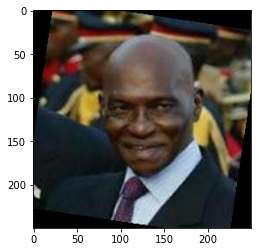

In [166]:
np.random.seed(42)
input_face=cv2.imread('Photo2.jpg')
plt.imshow(cv2.cvtColor(input_face,cv2.COLOR_BGR2RGB))

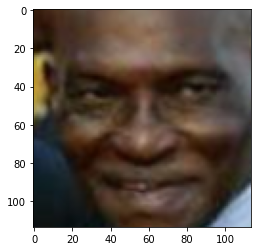

In [178]:
face=fd.detect(cv2.cvtColor(input_face, cv2.COLOR_BGR2GRAY),
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30,30))

x,y,w,h = face[0]
l=0
l=len(Collages)-7
face_img = input_face[y:y+h, x:x+w]
# plt.imshow(cv2.cvtColor(face_img,cv2.COLOR_BGR2RGB))
face_img=cv2.resize(face_img,(114,114))
plt.imshow(cv2.cvtColor(face_img,cv2.COLOR_BGR2RGB))
                

In [168]:
for collage in Collages:
    getImage(cv2.cvtColor(collage,cv2.COLOR_BGR2RGB))

In [129]:
# img=Collages[1]
# getImage(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# faces = fd.detect(
#                 cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
#                 scaleFactor=1.1,
#                 minNeighbors=5,
#                 minSize=(30,30)
#                 )

# crop_faces=[]

# for (x,y,w,h) in faces:
#     crop_faces.append(cv2.resize(img[y:y+h, x:x+w],(114,114)))


KeyboardInterrupt: 

In [72]:
# len(crop_faces)

17

In [76]:
# model=tf.keras.models.load_model('Model')
# getImage(cv2.cvtColor(crop_faces[1],cv2.COLOR_BGR2RGB))
# z=crop_faces[1]
# pair_image1 = np.expand_dims(face_img, axis=-1)
# pair_image1 = np.expand_dims(pair_image1, axis=0)
# pair_image2 = np.expand_dims(z, axis=-1)
# pair_image2 = np.expand_dims(pair_image2, axis=0)
# prediction = model.predict([pair_image1, pair_image2])
# print(prediction[0][0])

0.8504806


In [123]:
# resnet1.eval()

Sequential(
  (0): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (1): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (2): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (5): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3,

In [97]:
# resnet152.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
# pair_image1=preprocess(Image.fromarray(cv2.cvtColor(cv2.imread('Photo21.jpg'),cv2.COLOR_BGR2RGB)))
# pair_image1=torch.unsqueeze(pair_image1,0)
# pair_image2=preprocess(Image.fromarray(cv2.cvtColor(cv2.imread('Photo11.jpg'),cv2.COLOR_BGR2RGB)))
# pair_image2=torch.unsqueeze(pair_image2,0)
# emb1=resnet1(pair_image1)
# e1=emb1.numpy()
# emb2=resnet1(pair_image2)
# e2=emb2.numpy()


In [121]:
# e1=e1.reshape((1,2048))
# e2=e2.reshape((1,2048))
# dist=np.linalg.norm(e1-e2)

# print(dist)

20.99904


In [169]:
model=tf.keras.models.load_model('efficient_saved_model')

In [170]:
face_img.shape

(114, 114, 3)

In [171]:
Collages1=Collages
Collages=np.delete(Collages,2,axis=0)

In [181]:
from tensorflow.keras import backend as k
matched_indices=[]
count = 0

for i in range(l+1):
    
    
    crop_faces=[]
    image = Collages[i]
    #getImage(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    faces = fd.detect(
                cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30,30)
                )
    
    for (x,y,w,h) in faces:
        crop_faces.append(cv2.resize(image[y:y+h, x:x+w],(114,114)))
    # print(face_img.shape)
    # break
    # for i in crop_faces:
    #     getImage(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))
    

    for i in range(0,len(crop_faces)):
        pair_image1 = np.expand_dims(face_img, axis=-1)
        pair_image1 = np.expand_dims(pair_image1, axis=0)
        pair_image2 = np.expand_dims(crop_faces[i], axis=-1)
        pair_image2 = np.expand_dims(pair_image2, axis=0)


        # pair_image1=preprocess(Image.fromarray(cv2.cvtColor(pair_image1,cv2.COLOR_BGR2RGB)))
        # pair_image1=torch.unsqueeze(pair_image1,0)
        # pair_image2=preprocess(Image.fromarray(cv2.cvtColor(pair_image2,cv2.COLOR_BGR2RGB)))
        # pair_image2=torch.unsqueeze(pair_image2,0)

        # emb1=resnet152(pair_image1)
        # e1=emb1.numpy()
        # emb2=resnet152(pair_image2)
        # e2=emb2.numpy()
        # e1=e1.reshape((1,2048))
        # e2=e2.reshape((1,2048))
        # dist=np.linalg.norm(e1-e2)
        # res=1-(1/(1+np.exp(-dist)))
        # print(res)
        # if(res>0.5):
        #     getImage(cv2.cvtColor(crop_faces[i],cv2.COLOR_BGR2RGB))
        #     matched_indices.append(count)
        #     count+=1
        #     break


        # emb1=resnet(torch.from_numpy(face_img).unsqueeze(0))
        # emb2=resnet(torch.from_numpy(crop_faces[i]).unsqueeze(0))
        # dist = np.sum(np.square(emb1 - emb2))
        # res=1-np.sigmoid(dist)
        # if(res>0.5):
        #     print(res)
        #     getImage(cv2.cvtColor(crop_faces[i],cv2.COLOR_BGR2RGB))
        #     matched_indices.append(count)
        #     count+=1
        #     break

        p = model.predict([pair_image1, pair_image2])
        if p[0][0] > 0.69:
            getImage(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
            matched_indices.append(count)
            count+=1
            break
  



In [182]:
print(matched_indices)

[0, 1, 2]
